In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

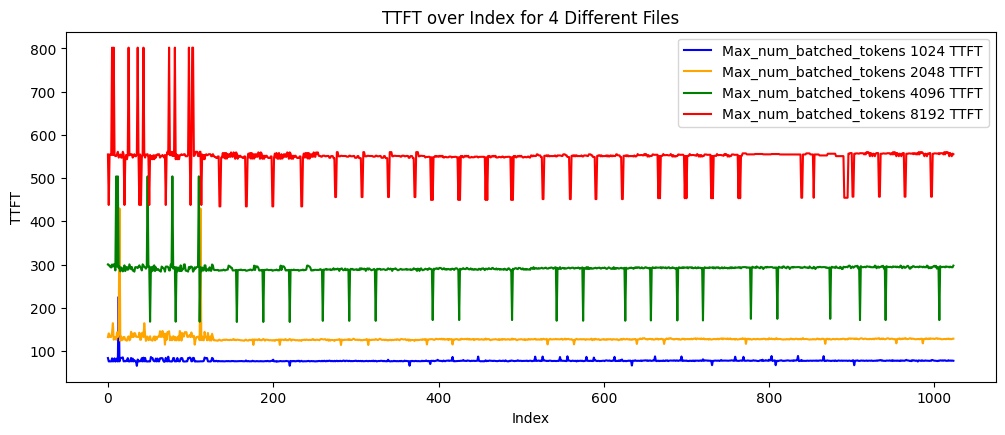

In [15]:
# Load the additional files to include them in the plots
file_paths = [
    './Meta-Llama-3.1-8B-Instruct_qps_inf_total_101.40829830989242_in_786432_out_131072_random_1024_max_max_num_batched_tokens1024.pkl',
    './Meta-Llama-3.1-8B-Instruct_qps_inf_total_91.63172522559762_in_786432_out_131072_random_1024_max_max_num_batched_tokens2048.pkl',
    './Meta-Llama-3.1-8B-Instruct_qps_inf_total_93.52749043703079_in_786432_out_131072_random_1024_max_max_num_batched_tokens4096.pkl',
    './Meta-Llama-3.1-8B-Instruct_qps_inf_total_90.6251277141273_in_786432_out_131072_random_1024_max_max_num_batched_tokens8192.pkl'
    
]

dfs = []
for path in file_paths:
    with open(path, 'rb') as file:
        data = pickle.load(file)
        df = pd.DataFrame(data)
        dfs.append(df)
colors = ['b','orange', 'green', 'red']
# Now we have 4 DataFrames in 'dfs'. Let's plot TTFT and TPOT separately for each.
plt.figure(figsize=(12, 10))

# First plot for TTFT
plt.subplot(2, 1, 1)
for i, df in enumerate(dfs):
    plt.plot(df.index, df['ttft'], label=f'Max_num_batched_tokens {(2**i)*1024} TTFT', color=colors[i])

plt.title('TTFT over Index for 4 Different Files')
plt.xlabel('Index')
plt.ylabel('TTFT')
plt.legend()


Mean TPOT for 1024: 61.28975181309215
Mean TPOT for 2048: 58.00715693840175
Mean TPOT for 4096: 57.51195338416437
Mean TPOT for 8192: 55.914123560796725


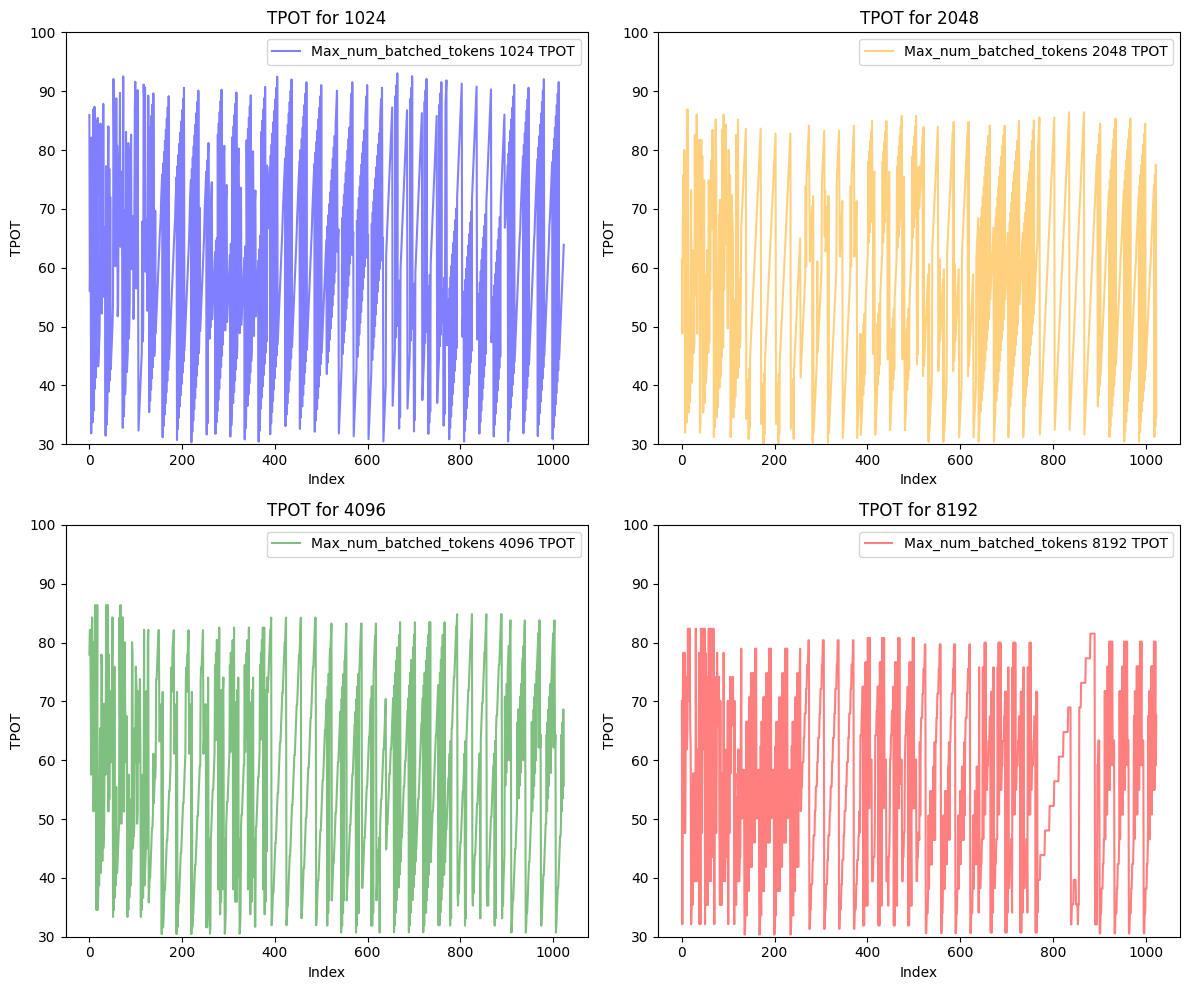

In [33]:
plt.figure(figsize=(12, 10))

# Create subplots for each file
for i, df in enumerate(dfs):
    plt.subplot(2, 2, i+1)
    plt.plot(df.index, df['tpot'], label=f'Max_num_batched_tokens {(2**i)*1024} TPOT', alpha=0.5, color=colors[i])
    plt.title(f'TPOT for {(2**i)*1024}')
    plt.xlabel('Index')
    plt.ylabel('TPOT')
    plt.ylim(30, 100)
    plt.legend()
    mean_tpot = df['tpot'].mean()
    print(f'Mean TPOT for {(2**i)*1024}: {mean_tpot}')

# Show the plots
plt.tight_layout()
plt.show()

/tmp/ipykernel_1196875/318466780.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


max: 93.04014220833778
min: 30.319765210151672
max: 86.86591312289238
min: 30.132342129945755
max: 86.37097291648388
min: 30.43990209698677
max: 82.35593885183334
min: 30.381180346012115


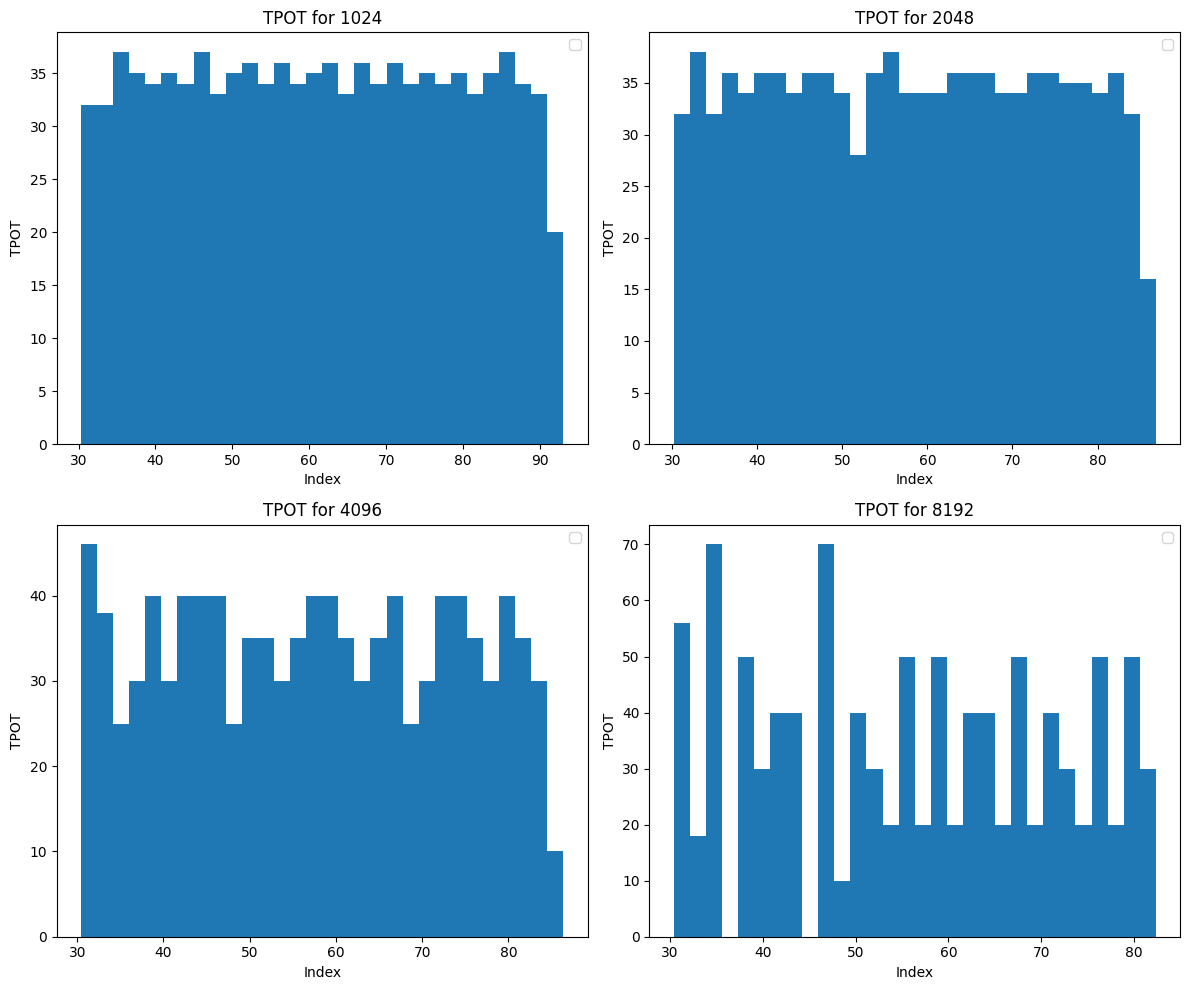

In [31]:
plt.figure(figsize=(12, 10))

# Create subplots for each file
for i, df in enumerate(dfs):
    plt.subplot(2, 2, i+1)
    # plt.plot(df.index, df['tpot'], label=f'Max_num_batched_tokens {(2**i)*1024} TPOT', alpha=0.3)
    # plt.scatter(df.index, df['tpot'], label=f'Max_num_batched_tokens {(2**i)*1024} TPOT', alpha=0.6, s=1)
    plt.hist(df['tpot'],bins=30)
    plt.title(f'TPOT for {(2**i)*1024}')
    plt.xlabel('Index')
    plt.ylabel('TPOT')
    plt.legend()
    print('max: '+str(max(df['tpot'])))
    print('min: '+str(min(df['tpot'])))
    

# Show the plots
plt.tight_layout()
plt.show()